# Домашнее задание 1

In [1]:
import pandas as pd


df = pd.read_csv("depression_data.tsv", sep="\t")
df.head()

,text,label,age
0,"Когда-то я был добрым романтиком, который стре...",1,32.0
1,Здраствуйте! Я каждый день просыпаюсь с мыслью...,1,28.0
2,У меня проблемы с девушкой. Каждую ссору я не ...,1,16.0
3,"Вся моя жизнь это один сплошной ад, в котором ...",1,32.0
4,Я хочу уснуть и не проснуться.каждый день одно...,1,14.0


# Часть 1

Найдите среднее значение возраста в диапазоне от 14 до 50 лет включительно.

In [2]:
df[(df['age'] >= 14) & (df['age'] <= 50)]['age'].mean()

22.704171601526518

Какую долю 16-летние авторы составляют в диапазоне от 16 до 26 лет включительно?

In [3]:
df[df['age'] == 16]['age'].value_counts() / df[(df['age'] >= 16) & (df['age'] <= 26)]['age'].value_counts().sum()

16.0    0.125941
Name: age, dtype: float64

Сколько в датасете текстов, авторам которых 28 или 30 лет?

In [4]:
len(df[(df['age'] == 28) | (df['age'] == 30)])

1185

С помощью одной встроенной в pandas функции отобразите всю статистику по колонке age в диапазоне от 18 до 30 лет включительно.

In [5]:
df[(df['age'] >= 18) & (df['age'] <= 30)]['age'].describe()

count    13205.000000
mean        22.676638
std          3.550254
min         18.000000
25%         20.000000
50%         22.000000
75%         25.000000
max         30.000000
Name: age, dtype: float64

Сколько в датасете положительных / отрицательных примеров?

In [6]:
print('Положительных примеров: ', len(df[df['label'] == 1]))
print('Отрицательных примеров: ', len(df[df['label'] == 0]))

Положительных примеров:  32018
Отрицательных примеров:  32021


# Часть 2

Посчитайте количество предложений в каждом тексте. Сохраните эти значения в отдельной колонке датафрейма.

In [7]:
import re

In [8]:
pip install razdel

Note: you may need to restart the kernel to use updated packages.


In [9]:
import razdel
from razdel import sentenize

In [10]:
num_sent = []
for text in df['text']:
    #sent = [s.text for s in sentenize(text)]
    num_sent.append(len([s.text for s in sentenize(text)]))

In [11]:
len(num_sent)

64039

In [12]:
df['number of sentences'] = num_sent

In [13]:
df.head()

,text,label,age,number of sentences
0,"Когда-то я был добрым романтиком, который стре...",1,32.0,15
1,Здраствуйте! Я каждый день просыпаюсь с мыслью...,1,28.0,6
2,У меня проблемы с девушкой. Каждую ссору я не ...,1,16.0,10
3,"Вся моя жизнь это один сплошной ад, в котором ...",1,32.0,5
4,Я хочу уснуть и не проснуться.каждый день одно...,1,14.0,18


Напишите функцию для токенизации текста. Удалите стоп-слова.

In [14]:
pip install pymorphy2

Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install git+https://github.com/aatimofeev/spacy_russian_tokenizer.git

  Cloning https://github.com/aatimofeev/spacy_russian_tokenizer.git to c:\users\vital\appdata\local\temp\pip-req-build-8570731h
  Created wheel for spacy-russian-tokenizer: filename=spacy_russian_tokenizer-0.1.1-py3-none-any.whl size=12757 sha256=a172f1aef7006ed01a4369eb8d7d8f9ac3e2747a4319dce8c48d1175b88cf1d4
  Stored in directory: C:\Users\vital\AppData\Local\Temp\pip-ephem-wheel-cache-67tdxp1o\wheels\05\d5\36\50ba3e6750df25a60775a5b26c9a2da7d5f8d1ae9a4ef59f8a
Successfully built spacy-russian-tokenizer
Note: you may need to restart the kernel to use updated packages.


  Running command git clone -q https://github.com/aatimofeev/spacy_russian_tokenizer.git 'C:\Users\vital\AppData\Local\Temp\pip-req-build-8570731h'


In [16]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from spacy.lang.ru import Russian
from spacy_russian_tokenizer import RussianTokenizer, MERGE_PATTERNS
from pymorphy2 import MorphAnalyzer
import pymorphy2

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vital\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
def tokenize(text):
    # убираем стоп-слова
    text = ' '.join([word for word in text.lower().split() if word not in stopwords.words('russian')])
    # разбиваем на токены
    nlp = Russian()
    doc = nlp(text)
    russian_tokenizer = RussianTokenizer(nlp, MERGE_PATTERNS)
    nlp.add_pipe(russian_tokenizer, name='russian_tokenizer')
    doc = nlp(text)
    return ' '.join([token.text for token in doc if token.text not in ',.!?-();:""«»—_–#' and '.' not in token.text])

In [18]:
tokenize(df['text'][0])

'когда-то добрым романтиком который стремился помочь всем попросит жалко верил человечность однако это фальшем суррогатная дружба какие-то непонятные отношения девушка которая клялась любит итоге изменила ушла другому появилось бесперспективный попросту достаточного достатка собственного жилья родители шизофренией никто поддерживал поддерживает итак отдавая кусочек каждому потерял свое душевное тепло стало безразлично апатия бывшая девушка всяких усилий нашла нового который сразу женился возит разным странам мира же брался любую работу показать хуже часто обманывали недоплачивали оплачивали вовсе простой неудачник который потерял смысл жизни мою ситуацию спасает внешность ужасная попросту урод часто завидую тем кому повезло внешностью любят дается легко занимаюсь своим любимым делом часто посещают мысли никому это надо также я это тщетно бессмысленно это сказывается пустота внутри меня часто удивляет многим повезло складывается почему складывается меня почему выходит как-то потеряют до

Посчитайте количество токенов в тексте (без стоп-слов). Найдите среднее этих значений как по всей выборке, так и внутри каждого класса.

In [19]:
num_tokens = [len(tokenize(text).split()) for text in df['text']]

In [20]:
len(num_tokens)

64039

In [21]:
df['number of tokens'] = num_tokens

In [22]:
df.head()

,text,label,age,number of sentences,number of tokens
0,"Когда-то я был добрым романтиком, который стре...",1,32.0,15,163
1,Здраствуйте! Я каждый день просыпаюсь с мыслью...,1,28.0,6,68
2,У меня проблемы с девушкой. Каждую ссору я не ...,1,16.0,10,45
3,"Вся моя жизнь это один сплошной ад, в котором ...",1,32.0,5,25
4,Я хочу уснуть и не проснуться.каждый день одно...,1,14.0,18,197


In [23]:
print('Среднее значение по всей выборке: ', sum(num_tokens) / len(num_tokens))

Среднее значение по всей выборке:  109.12942113399647


In [24]:
print('Среднее значение для класса 1: ', 
      df.loc[df['label'] == 1, 'number of tokens'].sum() / len(df[df['label'] == 1]))
print('Среднее значение для класса 0: ', 
      df.loc[df['label'] == 0, 'number of tokens'].sum() / len(df[df['label'] == 0]))

Среднее значение для класса 1:  73.4742020113686
Среднее значение для класса 0:  144.7812997720246


Напишите функцию, которая переводит текст в последовательность лемм.

In [26]:
def lemmatize(text):
    morph = pymorphy2.MorphAnalyzer()
    return ' '.join([morph.parse(word)[0].normal_form for word in text.split()])

In [27]:
text = tokenize(df['text'][0])

In [28]:
lemmatize(text)

'когда-то добрый романтик который стремиться помочь весь попросить жалко верить человечность однако это фальший суррогатный дружба какой-то непонятный отношение девушка который клясться любить итог изменить уйти другой появиться бесперспективный попросту достаточный достаток собственный жильё родитель шизофрения никто поддерживать поддерживать итак отдавать кусочек каждый потерять свой душевный тепло стать безразличный апатия бывший девушка всякий усилие найти новое который сразу жениться возить разный страна мир же браться любой работа показать худой часто обманывать недоплачивать оплачивать вовсе простой неудачник который потерять смысл жизнь мой ситуация спасать внешность ужасный попросту урод часто завидовать тем кома повезти внешность любить даваться легко заниматься свой любимый дело часто посещать мысль никто это надо также я это тщетно бессмысленно это сказываться пустота внутри я часто удивлять многий повезти складываться почему складываться я почему выходить как-то потерять д

Напишите функцию, которая переводит текст в последовательность частеречных тегов.

In [ ]:
def pos(text):
    morph = pymorphy2.MorphAnalyzer()
    return ' '.join([morph.parse(word)[0].tag.POS for word in text.split()])

In [ ]:
pos(text)

'ADVB ADJF NOUN ADJF VERB INFN ADJF VERB ADVB VERB NOUN CONJ PRCL ADJF ADJF NOUN ADJF ADJF NOUN NOUN ADJF VERB VERB NOUN VERB VERB ADJF VERB ADJF ADVB ADJF NOUN ADJF NOUN NOUN NOUN NPRO VERB VERB CONJ GRND NOUN ADJF VERB ADJF ADJF ADVB VERB ADJS NOUN ADJF NOUN ADJF NOUN VERB NOUN ADJF ADVB VERB VERB ADJF NOUN NOUN PRCL VERB ADJF NOUN INFN COMP ADVB VERB VERB VERB ADVB NOUN NOUN ADJF VERB NOUN NOUN ADJF NOUN VERB NOUN ADJF ADVB NOUN ADVB VERB CONJ NOUN VERB NOUN VERB VERB ADVB VERB ADJF ADJF NOUN ADVB VERB NOUN NPRO PRCL PRED CONJ NPRO PRCL ADVB ADVB PRCL VERB NOUN PREP NPRO ADVB VERB ADJF VERB VERB ADVB VERB NPRO ADVB VERB ADVB VERB NOUN ADJF VERB PRCL NPRO PRCL ADJF NOUN ADJS PRCL VERB VERB PRCL ADJF NOUN VERB ADJF VERB VERB NOUN VERB PRCL VERB ADJS PRCL COMP PRCL VERB INFN PRCL ADJF PRCL INFN ADJF NOUN'

Какие слова мы можем добавить в список стоп-слов? Приведите примеры и объясните, почему.

*Это*, потому что данное местоимение или частица имеет значение ближнего дейксиса и часто рассматривается как замена определенного артикля, отсутствующего в русском языке. Следовательно, слово не несет конкретного лексического значения и не может употребляться обособленно (составлять законченные высказывания, не зависящие от контекста), при этом употребляется в речи часто. При подсчете топ-слов текста для определения его тематики, если для удаления стоп-слов использовался список nltk, с большой вероятностью в перечень наиболее популярных слов войдет *это*, что никак не отразит содержание текстов. К таким же, но менее частотным словам можно отнести *то, вот, вон*

# Часть 3

Визуализируйте распределение количество предложений / текст.

In [24]:
from warnings import simplefilter
import seaborn as sns
simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt

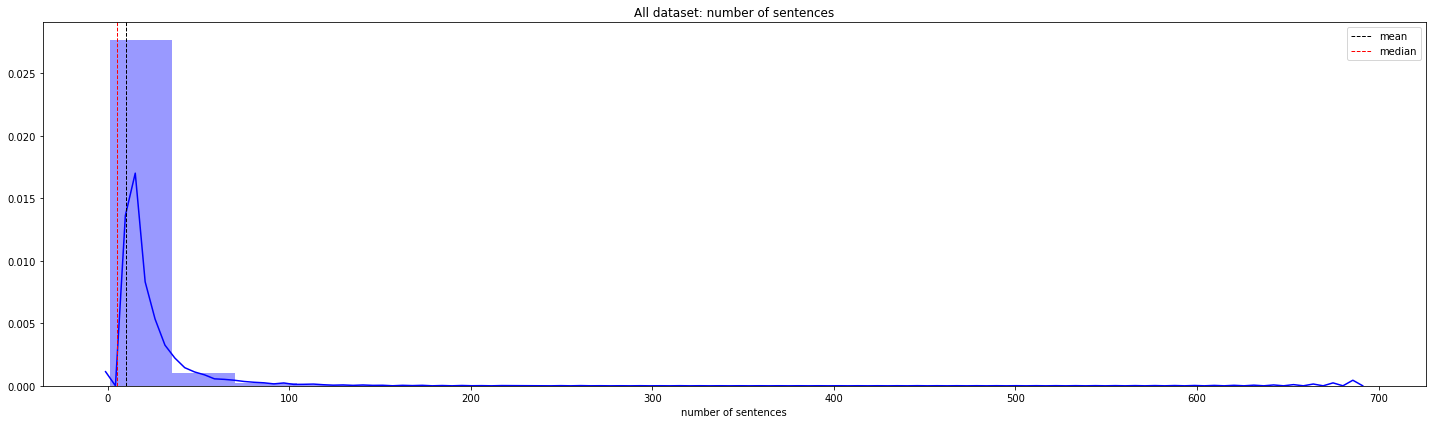

In [59]:
fig, axes = plt.subplots(figsize=(20, 6))
topic_subset = df['number of sentences']

sns.distplot(topic_subset, bins=20, color='blue')
axes.axvline(
            (topic_subset).mean(), color='k', linestyle='dashed', linewidth=1, label='mean'
        )
axes.axvline(
            (topic_subset).median(), color='r', linestyle='dashed', linewidth=1, label='median'
        )
axes.legend()
axes.set(title='All dataset: %s' % ('number of sentences'))
    
fig.tight_layout()

Визуализируйте распределение количество-предложений / текст внутри каждого класса.

In [44]:
def plot_len_dist(df, col_name):
    fig, axes = plt.subplots(1, 2, figsize=(20, 6))

    for i, topic in enumerate(list(df['label'].unique())):
        topic_subset = df[df['label'] == topic][col_name]

        sns.distplot(topic_subset, bins=20, color='blue', ax=axes[i])
        axes[i].axvline(
            (topic_subset).mean(), color='k', linestyle='dashed', linewidth=1, label='mean'
        )
        axes[i].axvline(
            (topic_subset).median(), color='r', linestyle='dashed', linewidth=1, label='median'
        )
        axes[i].legend()
        axes[i].set(title="Class %s: %s" % (topic, col_name))
    
    fig.tight_layout()

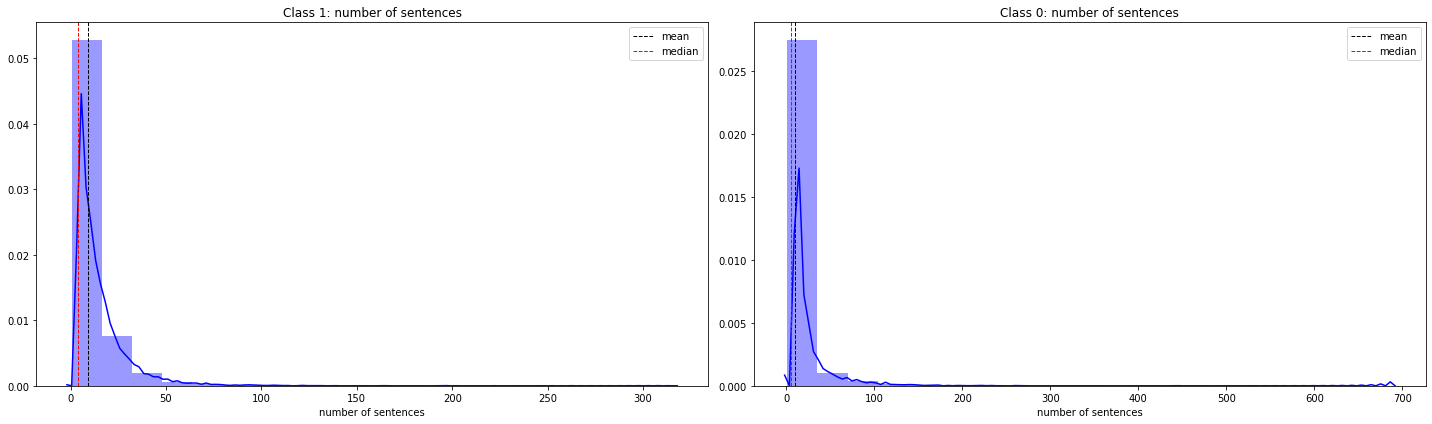

In [45]:
plot_len_dist(df, 'number of sentences')

Верно ли, что количество предложений в тексте коррелирует с возрастом автора в подвыборке от 16 до 32 лет включительно? Если да, какая это корреляция – положительная или отрицательная? Визуализируйте матрицу корреляции.

In [87]:
age = df[(df['age'] >= 16) & (df['age'] <= 32)]['age']
new_df = pd.DataFrame(age, columns=['age'])
new_df['number of sentences'] = df[(df['age'] >= 16) & (df['age'] <= 32)]['number of sentences']

In [88]:
new_df.head()

,age,number of sentences
0,32.0,16
1,28.0,6
2,16.0,11
3,32.0,6
7,18.0,5


In [85]:
new_df.corr()

,age,number of sentences
age,1.000000,0.045484
number of sentences,0.045484,1.000000


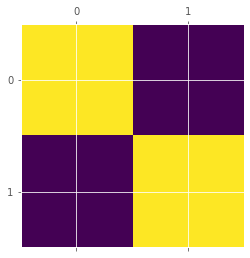

In [86]:
plt.matshow(new_df.corr())

Количество предложений в тексте не коррелирует с возрастом автора в подвыборке от 16 до 32 лет

# Часть 4

Самостоятельно реализуйте функцию для получения посимвольных н-грамм (без использования библиотек).

In [ ]:
def char_ngrams(text, n):
    return [text[i:i+n] for i in range(len(text)) if len(text[i:i+n]) == n] 

In [ ]:
text = "уставшая мама мыла грязную раму"
char_ngrams(text, n=3)

['уст',
 'ста',
 'тав',
 'авш',
 'вша',
 'шая',
 'ая ',
 'я м',
 ' ма',
 'мам',
 'ама',
 'ма ',
 'а м',
 ' мы',
 'мыл',
 'ыла',
 'ла ',
 'а г',
 ' гр',
 'гря',
 'ряз',
 'язн',
 'зну',
 'ную',
 'ую ',
 'ю р',
 ' ра',
 'рам',
 'аму']

Самостоятельно реализуйте функцию для получения пословных н-грамм (без использования библиотек).

In [ ]:
def word_ngrams(text, n):
    text = text.split()
    return [text[i:i+n] for i in range(len(text)) if len(text[i:i+n]) == n]

In [ ]:
word_ngrams(text, n=3)

[['уставшая', 'мама', 'мыла'],
 ['мама', 'мыла', 'грязную'],
 ['мыла', 'грязную', 'раму']]

Самостоятельно реализуйте функцию для получения н-грамм лемм (без использования библиотек).

In [ ]:
def lemma_ngrams(text, n):
    text = lemmatize(text).split()
    return [text[i:i+n] for i in range(len(text)) if len(text[i:i+n]) == n]

In [ ]:
lemma_ngrams(text, n=4)

[['устать', 'мама', 'мыло', 'грязный'], ['мама', 'мыло', 'грязный', 'рам']]

Самостоятельно реализуйте функцию для получения н-грамм частеречных тегов (без использования библиотек).

In [ ]:
def pos_ngrams(text, n):
    text = pos(text).split()
    return [text[i:i+n] for i in range(len(text)) if len(text[i:i+n]) == n]

In [ ]:
pos_ngrams(text, n=4)

[['PRTF', 'NOUN', 'NOUN', 'ADJF'], ['NOUN', 'NOUN', 'ADJF', 'NOUN']]

Самостоятельно реализуйте функцию для получения частотного словаря частеречных тегов по коллекции документов.

In [ ]:
def build_pos_dict(corpus):
    pos_words = ' '.join(pos(text) for text in corpus).split()
    d = {}
    for key in pos_words:
        if key in d:
            value = d[key]
            d[key] = value + 1
        else:
            d[key] = 1
    return d

In [ ]:
corpus = [
    "мама мыла уставшую раму",
    "высшая школа экономики",
    "компьютерная лингвистика",
    "осень наступила"
]

build_pos_dict(corpus)

{'ADJF': 2, 'NOUN': 7, 'PRTF': 1, 'VERB': 1}

Постройте частотный словарь лемм по текстам внутри каждого класса. Найдите топ-15 лемм для текстов каждого класса. Есть ли между этими списками пересечение? Если да, сколько лемм пересекается?

In [29]:
# весь корпус лемматизируется очень долго, поэтому для списков топ-15 лемм используется по 250 текстов каждого класса
texts_class0 = df[df['label'] == 0]['text'][0:250]
texts_class1 = df[df['label'] == 1]['text'][0:250]
lemmas_class0 = ' '.join(lemmatize(tokenize(text)) for text in texts_class0).split()
lemmas_class1 = ' '.join(lemmatize(tokenize(text)) for text in texts_class1).split()

In [30]:
def top_lemmas(lemmas):
    d = {}
    for key in lemmas:
        if key in d:
            value = d[key]
            d[key] = value + 1
        else:
            d[key] = 1

    list_d = list(d.items())
    list_d.sort(key=lambda i: i[1], reverse=True)
    return list_d[:15]

In [31]:
print('Топ-15 лет для класса 0', top_lemmas(lemmas_class0))
print('Топ-15 лет для класса 1', top_lemmas(lemmas_class1))

Топ-15 лет для класса 0 [('год', 298), ('который', 144), ('область', 133), ('казахстан', 123), ('это', 102), ('работа', 96), ('город', 91), ('человек', 90), ('россия', 89), ('район', 89), ('свой', 88), ('проект', 88), ('президент', 86), ('также', 85), ('наш', 84)]
Топ-15 лет для класса 1 [('это', 250), ('хотеть', 240), ('год', 221), ('я', 212), ('жить', 210), ('мочь', 190), ('очень', 173), ('жизнь', 171), ('весь', 169), ('знать', 136), ('мой', 135), ('свой', 121), ('человек', 120), ('просто', 119), ('который', 116)]


In [32]:
a = [i[0] for i in top_lemmas(lemmas_class0)]
b = [i[0] for i in top_lemmas(lemmas_class1)]
intersection = []
for i in a:
    if i in intersection:
        continue
    for j in b:
        if i == j:
            intersection.append(i)
            break

In [33]:
print('Пересечение списков топ лемм ', intersection)

Пересечение списков топ лемм  ['год', 'который', 'это', 'человек', 'свой']


Какие текстовые признаки могли бы быть полезными для решения задачи классификации на этих данных? Приведите примеры и перечислите ресурсы, которые вы бы использовали для конструирования этих признаков.

(для бинарной классификации является/не является текст депрессивным) Тональность текста или частотность словоформ негативной эмоциональной окраски (с помощью размеченных тезаурусов типа WordNet-Affect, SentiWordNet). Также можно попробовать рассмотреть частотность одушевленных существительных (pymorphy2), так как в депрессивных текстах авторы много описывают проблемы в взаимоотношениях с другими людьми, модальность (в списке топ-лемм видно, что для текстов класса 1 часто используются глаголы типа хотеть, мочь,: для извлечения SlinkET), частотность н-грамм с отрицательными частицами и глаголами (предложения типа типа меня никто не любит, не хочу жить и т.д.: nltk) и tf-idf